# Описание задачи
Датасет содержит релеавнтную информацию о пациетнах, на основании которой предполагается предсказать возможность возникновения инсульта.
## Оригинальное описание
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.
## Оригинальное описание признаков
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [1]:
import os
import numpy
import pandas
import matplotlib.pyplot
import seaborn

numpy.random.seed(42)

# Загрузка датасета

In [2]:
DATASET_PATH = os.path.abspath(os.path.join(os.getcwd(), '..', 'healthcare-dataset-stroke-data.csv'))

In [3]:
dataset = pandas.read_csv(DATASET_PATH)
dataset.columns = dataset.columns.str.strip()

Число объектов, признаков

In [4]:
dataset.shape

(5110, 12)

# Подготовка датасета

## Удаление ненужных значений
Уберём столбец **id**

In [5]:
dataset.drop('id', axis=1, inplace=True)

## Обработка пропущенных значений
Столбцы **bmi** и **smoking_status** содержат в себе пропущенные значения

Заменим 'N/A' и 'Uknown' на явное отсутсвие значения

In [6]:
dataset['bmi'].replace({'N/A': None}, inplace=True)
dataset['smoking_status'].replace({'Unknown': None}, inplace=True)

**bmi** является числовым признаком, поэтому пропущенные значения заменим медианной величиной

In [7]:
dataset['bmi'].fillna(dataset['bmi'].median(), inplace=True)

**smoking_status** является категориальным признаком с большим числом пропусков, поэтому пропущенные значения будем заполнять не модой, а сохраняя распределение среди известных записей

In [8]:
probabilities = dataset['smoking_status'].value_counts(normalize=True)
missing = dataset['smoking_status'].isnull()
dataset.loc[missing, 'smoking_status'] = numpy.random.choice(probabilities.index, size=len(dataset[missing]), p=probabilities.values)

## Обработка бинарных признаков
Изменим признаки **gender**, **ever_married**, **Residence_type**, пускай теперь они принимаю соостяния 0 или 1, где 0 это **Male**, **No**, **Rural**, а 1 это **Female**, **Yes**, **Urban** соответсвенно.

In [9]:
dataset['gender'] = numpy.where(dataset['gender'] == 'Female', 1, 0)
dataset['ever_married'] = numpy.where(dataset['ever_married'] == 'Yes', 1, 0)
dataset['Residence_type'] = numpy.where(dataset['Residence_type'] == 'Urban', 1, 0)

## Обработка категориальных признаков
Бинаризуем категориальный признаки **work_type**, **smoking_status**

In [10]:
dataset = pandas.get_dummies(dataset)

In [ ]:
rows_to_drop = dataset[
    (dataset['price'] < dataset['price'].quantile(0.005)) |
    (dataset['price'] > dataset['price'].quantile(0.995)) | 
    (dataset['carat']  < dataset['carat' ].quantile(0.005)) |
    (dataset['carat']  > dataset['carat' ].quantile(0.995))
    ].index
dataset = dataset.drop(rows_to_drop)

# Визуализация
Выведем основные метрики

In [11]:
dataset.describe()

gender          age  hypertension  heart_disease  ever_married  \
count  5110.000000  5110.000000   5110.000000    5110.000000   5110.000000   
mean      0.585910    43.226614      0.097456       0.054012      0.656164   
std       0.492612    22.612647      0.296607       0.226063      0.475034   
min       0.000000     0.080000      0.000000       0.000000      0.000000   
25%       0.000000    25.000000      0.000000       0.000000      0.000000   
50%       1.000000    45.000000      0.000000       0.000000      1.000000   
75%       1.000000    61.000000      0.000000       0.000000      1.000000   
max       1.000000    82.000000      1.000000       1.000000      1.000000   

       Residence_type  avg_glucose_level          bmi       stroke  \
count     5110.000000        5110.000000  5110.000000  5110.000000   
mean         0.508023         106.147677    28.862035     0.048728   
std          0.499985          45.283560     7.699562     0.215320   
min          0.000000          55.120000    10.300000     0.000000   
25%          0.000000          77.245000    23.800000     0.000000   
50%          1.000000          91.885000    28.100000     0.000000   
75%          1.000000         114.090000    32.800000     0.000000   
max          1.000000         271.740000    97.600000     1.000000   

       work_type_Govt_job  work_type_Never_worked  work_type_Private  \
count         5110.000000             5110.000000        5110.000000   
mean             0.128571                0.004305           0.572407   
std              0.334758                0.065480           0.494778   
min              0.000000                0.000000           0.000000   
25%              0.000000                0.000000           0.000000   
50%              0.000000                0.000000           1.000000   
75%              0.000000                0.000000           1.000000   
max              1.000000                1.000000           1.000000   

       work_type_Self-employed  work_type_children  \
count              5110.000000         5110.000000   
mean                  0.160274            0.134442   
std                   0.366896            0.341160   
min                   0.000000            0.000000   
25%                   0.000000            0.000000   
50%                   0.000000            0.000000   
75%                   0.000000            0.000000   
max                   1.000000            1.000000   

       smoking_status_formerly smoked  smoking_status_never smoked  \
count                     5110.000000                  5110.000000   
mean                         0.248532                     0.528963   
std                          0.432204                     0.499209   
min                          0.000000                     0.000000   
25%                          0.000000                     0.000000   
50%                          0.000000                     1.000000   
75%                          0.000000                     1.000000   
max                          1.000000                     1.000000   

       smoking_status_smokes  
count            5110.000000  
mean                0.222505  
std                 0.415969  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

Веведем матрицу корреляции, дабы выявить зависимость признаков между собой

In [12]:
correlation_matrix = dataset.corr()
correlation_matrix

gender       age  hypertension  \
gender                          1.000000  0.027924     -0.021143   
age                             0.027924  1.000000      0.276398   
hypertension                   -0.021143  0.276398      1.000000   
heart_disease                  -0.085617  0.263796      0.108306   
ever_married                    0.030483  0.679125      0.164243   
Residence_type                  0.006340  0.014180     -0.007913   
avg_glucose_level              -0.054902  0.238171      0.174474   
bmi                             0.026642  0.324296      0.158293   
stroke                         -0.009027  0.245257      0.127904   
work_type_Govt_job              0.016685  0.130013      0.017685   
work_type_Never_worked         -0.011469 -0.078653     -0.021608   
work_type_Private               0.032294  0.116534     -0.005413   
work_type_Self-employed         0.026143  0.327989      0.115442   
work_type_children             -0.089120 -0.634215     -0.129506   
smoking_status_formerly smoked -0.045144  0.102340      0.012567   
smoking_status_never smoked     0.062310 -0.068693      0.000762   
smoking_status_smokes          -0.027873 -0.023895     -0.013972   

                                heart_disease  ever_married  Residence_type  \
gender                              -0.085617      0.030483        0.006340   
age                                  0.263796      0.679125        0.014180   
hypertension                         0.108306      0.164243       -0.007913   
heart_disease                        1.000000      0.114644        0.003092   
ever_married                         0.114644      1.000000        0.006261   
Residence_type                       0.003092      0.006261        1.000000   
avg_glucose_level                    0.161857      0.155068       -0.004946   
bmi                                  0.036916      0.334911       -0.000277   
stroke                               0.134914      0.108340        0.015458   
work_type_Govt_job                   0.001330      0.134041        0.013131   
work_type_Never_worked              -0.015712     -0.090838        0.022859   
work_type_Private                    0.000027      0.153830       -0.018173   
work_type_Self-employed              0.086760      0.192716        0.010594   
work_type_children                  -0.091634     -0.544441       -0.002309   
smoking_status_formerly smoked       0.032864      0.065467        0.002545   
smoking_status_never smoked         -0.041615     -0.072314       -0.019752   
smoking_status_smokes                0.015796      0.018762        0.021060   

                                avg_glucose_level       bmi    stroke  \
gender                                  -0.054902  0.026642 -0.009027   
age                                      0.238171  0.324296  0.245257   
hypertension                             0.174474  0.158293  0.127904   
heart_disease                            0.161857  0.036916  0.134914   
ever_married                             0.155068  0.334911  0.108340   
Residence_type                          -0.004946 -0.000277  0.015458   
avg_glucose_level                        1.000000  0.166876  0.131945   
bmi                                      0.166876  1.000000  0.036110   
stroke                                   0.131945  0.036110  1.000000   
work_type_Govt_job                       0.013845  0.077856  0.002677   
work_type_Never_worked                  -0.014675 -0.028327 -0.014882   
work_type_Private                        0.016588  0.203886  0.011888   
work_type_Self-employed                  0.062694  0.070160  0.062168   
work_type_children                      -0.102250 -0.442102 -0.083869   
smoking_status_formerly smoked           0.033412  0.025287  0.035998   
smoking_status_never smoked             -0.015330 -0.032137 -0.023147   
smoking_status_smokes                   -0.016318  0.012294 -0.009624   

                                work_type_Govt_job  work_type_Never_wor

<AxesSubplot:>

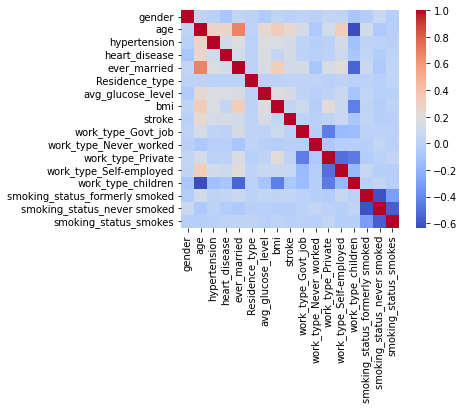

In [13]:
seaborn.heatmap(correlation_matrix, square=True, cmap="coolwarm")

Полученные корреляция яляются предсказуемыми, например связь между малым возрастом и видом занятости "ребёнок" или увеличение количества людей состоящих в браке с повышением возраста

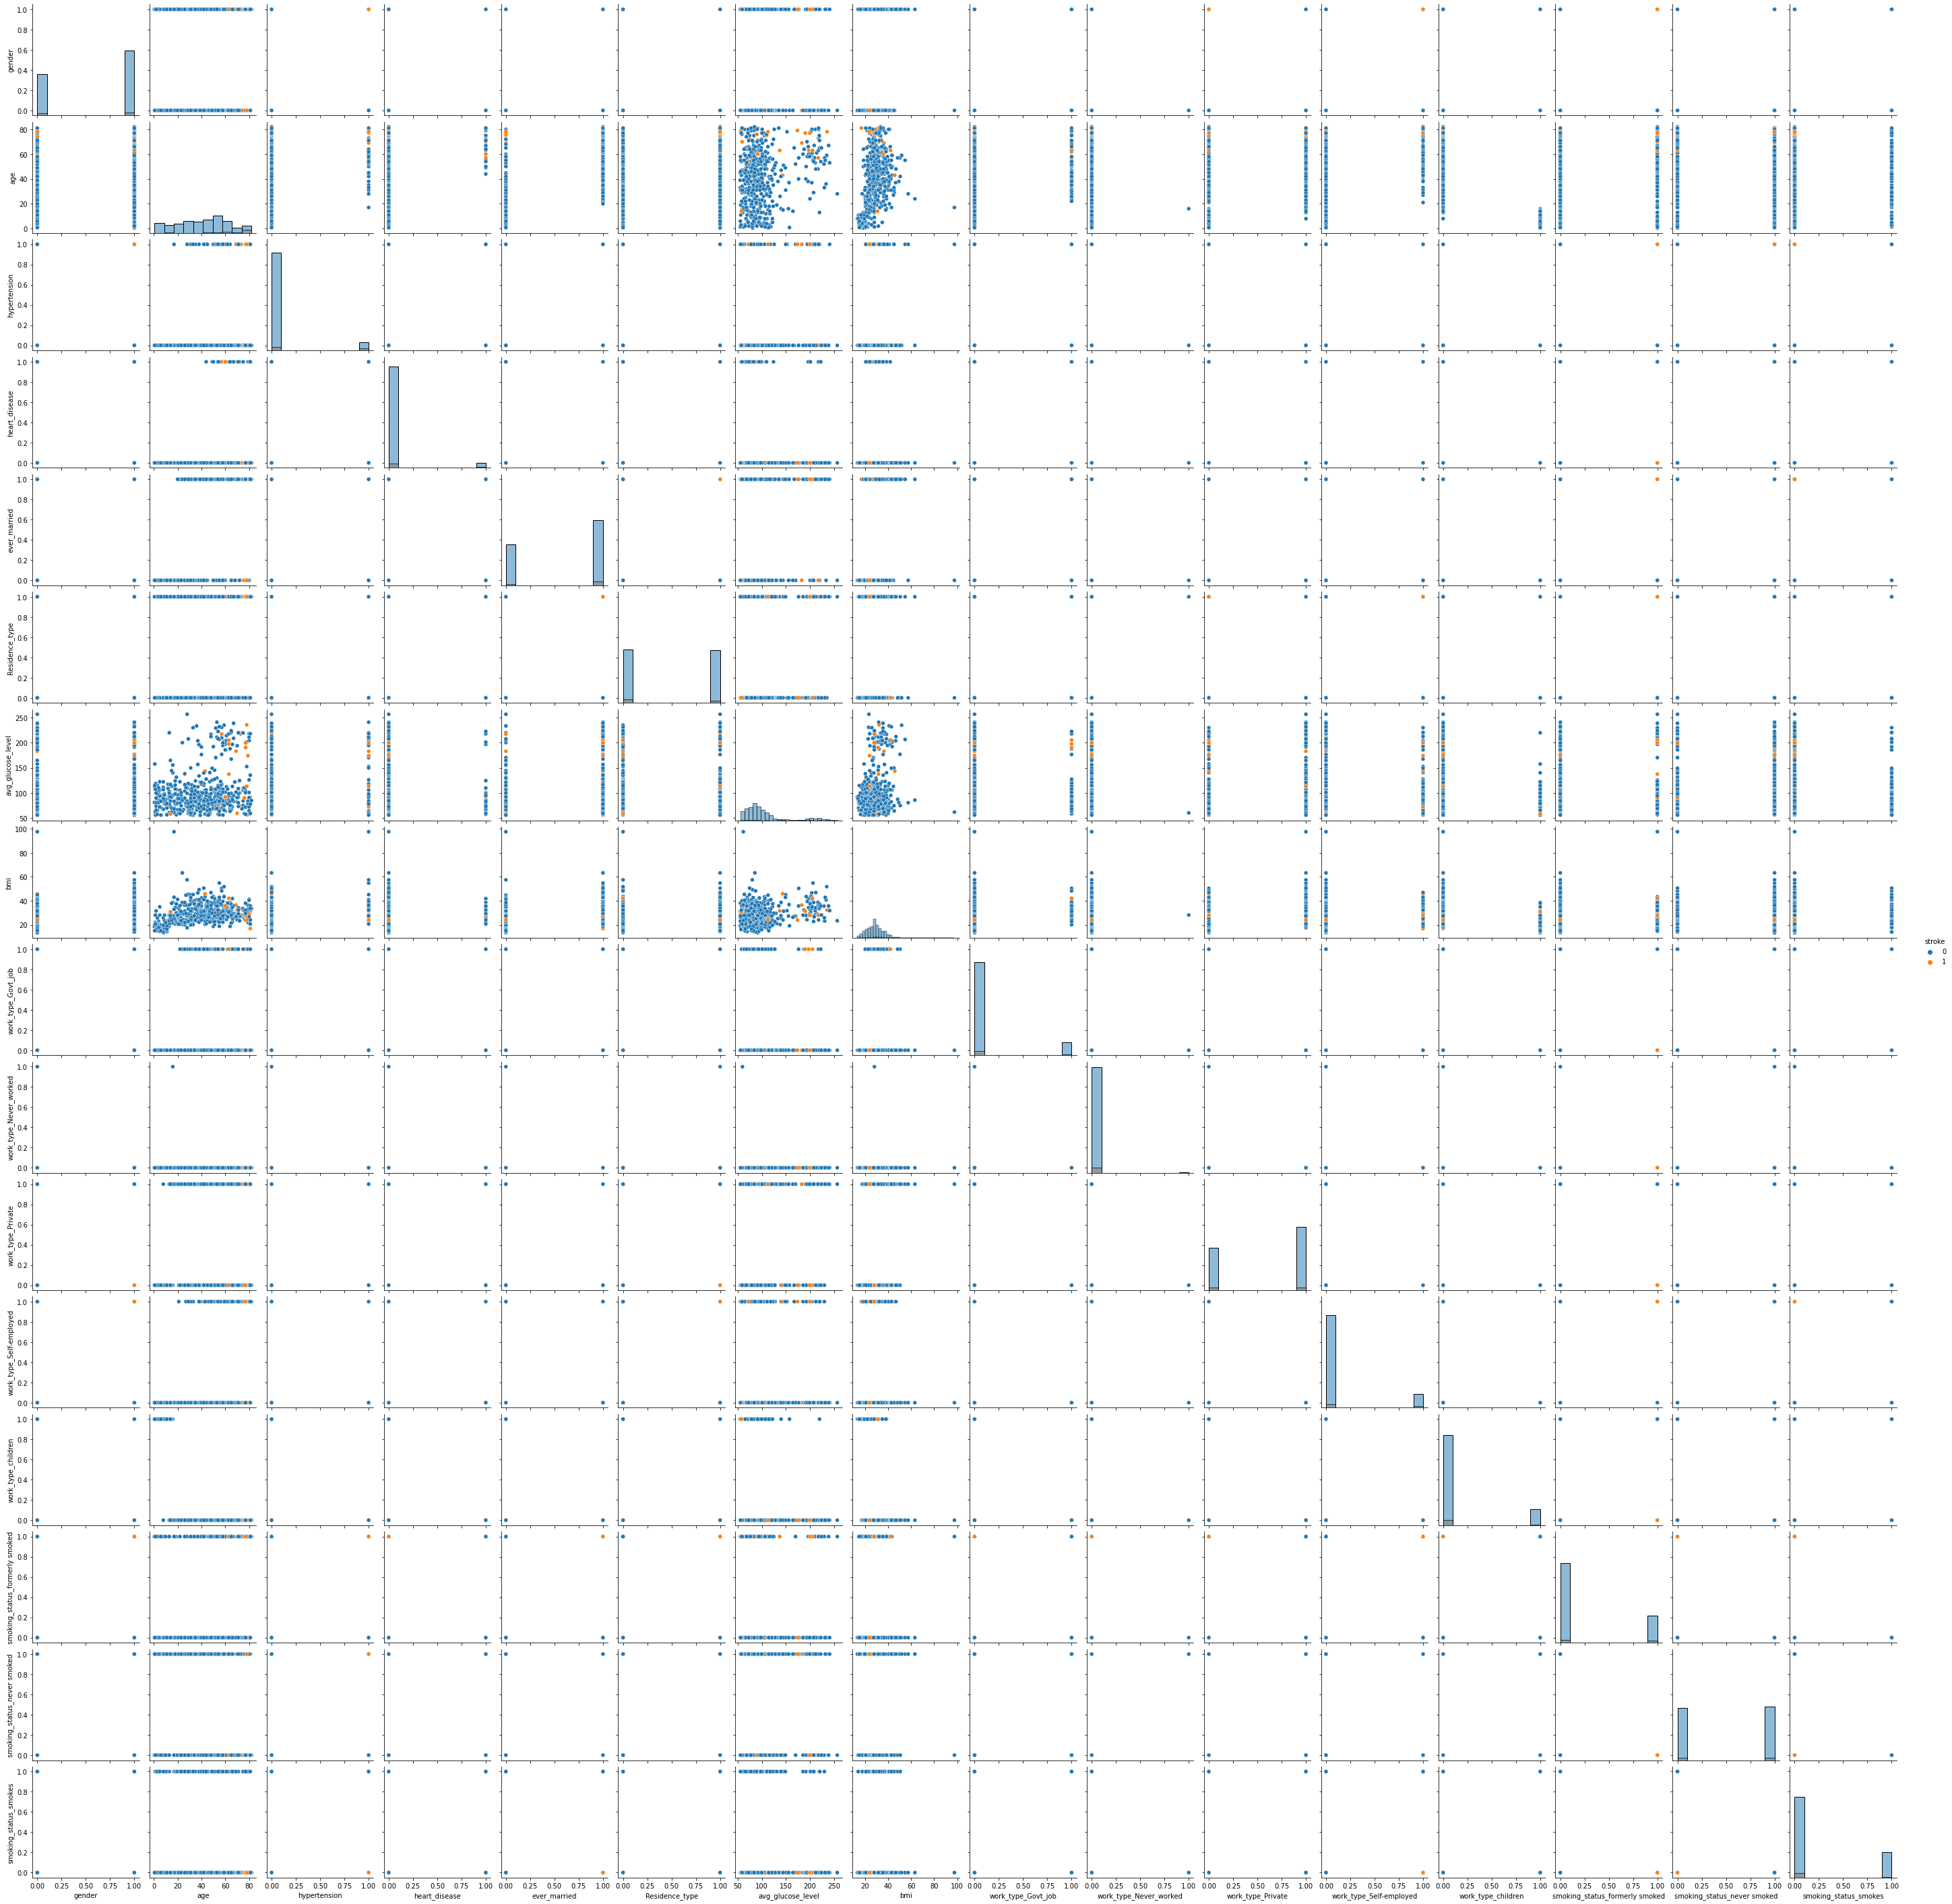

In [14]:
random_subset = numpy.random.choice(numpy.arange(dataset.shape[0]), size=500, replace=False)
seaborn.pairplot(dataset.iloc[random_subset], hue='stroke', diag_kind='hist')

# Нормализация признаков
Нормализацию проведём методом стандартизации

In [15]:
dataset_normalized = (dataset - dataset.mean(axis = 0)) / dataset.std(axis = 0)
dataset_normalized.describe()

gender           age  hypertension  heart_disease  ever_married  \
count  5.110000e+03  5.110000e+03  5.110000e+03   5.110000e+03  5.110000e+03   
mean   1.251445e-17  3.893385e-17  2.780989e-18   3.615286e-17 -4.449583e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00  1.000000e+00   
min   -1.189394e+00 -1.908074e+00 -3.285697e-01  -2.389234e-01 -1.381301e+00   
25%   -1.189394e+00 -8.060363e-01 -3.285697e-01  -2.389234e-01 -1.381301e+00   
50%    8.406001e-01  7.842450e-02 -3.285697e-01  -2.389234e-01  7.238134e-01   
75%    8.406001e-01  7.859932e-01 -3.285697e-01  -2.389234e-01  7.238134e-01   
max    8.406001e-01  1.714677e+00  3.042899e+00   4.184622e+00  7.238134e-01   

       Residence_type  avg_glucose_level           bmi        stroke  \
count    5.110000e+03       5.110000e+03  5.110000e+03  5.110000e+03   
mean    -9.733462e-17       1.001156e-16 -4.171484e-17  6.674374e-17   
std      1.000000e+00       1.000000e+00  1.000000e+00  1.000000e+00   
min     -1.016078e+00      -1.126848e+00 -2.410791e+00 -2.263051e-01   
25%     -1.016078e+00      -6.382598e-01 -6.574445e-01 -2.263051e-01   
50%      9.839834e-01      -3.149637e-01 -9.897124e-02 -2.263051e-01   
75%      9.839834e-01       1.753909e-01  5.114531e-01 -2.263051e-01   
max      9.839834e-01       3.656787e+00  8.927516e+00  4.417948e+00   

       work_type_Govt_job  work_type_Never_worked  work_type_Private  \
count        5.110000e+03            5.110000e+03       5.110000e+03   
mean         7.786770e-17            2.780989e-18      -9.733462e-17   
std          1.000000e+00            1.000000e+00       1.000000e+00   
min         -3.840731e-01           -6.574993e-02      -1.156897e+00   
25%         -3.840731e-01           -6.574993e-02      -1.156897e+00   
50%         -3.840731e-01           -6.574993e-02       8.642120e-01   
75%         -3.840731e-01           -6.574993e-02       8.642120e-01   
max          2.603162e+00            1.520617e+01       8.642120e-01   

       work_type_Self-employed  work_type_children  \
count             5.110000e+03        5.110000e+03   
mean             -3.267662e-17       -1.112396e-17   
std               1.000000e+00        1.000000e+00   
min              -4.368378e-01       -3.940737e-01   
25%              -4.368378e-01       -3.940737e-01   
50%              -4.368378e-01       -3.940737e-01   
75%              -4.368378e-01       -3.940737e-01   
max               2.288731e+00        2.537100e+00   

       smoking_status_formerly smoked  smoking_status_never smoked  \
count                    5.110000e+03                 5.110000e+03   
mean                    -1.946692e-17                 1.042871e-17   
std                      1.000000e+00                 1.000000e+00   
min                     -5.750343e-01                -1.059601e+00   
25%                     -5.750343e-01                -1.059601e+00   
50%                     -5.750343e-01                 9.435665e-01   
75%                     -5.750343e-01                 9.435665e-01   
max                      1.738686e+00                 9.435665e-01   

       smoking_status_smokes  
count           5.110000e+03  
mean           -3.684811e-17  
std             1.000000e+00  
min            -5.349072e-01  
25%            -5.349072e-01  
50%            -5.349072e-01  
75%            -5.349072e-01  
max             1.869117e+00

# Классификация
Разделим данные на обучающую и тестовую выборку с соотношением 3:1

In [16]:
import sklearn
import sklearn.model_selection
import sklearn.neighbors
import sklearn.ensemble


In [17]:
x = dataset_normalized.drop(['stroke'], axis=1)
y = dataset['stroke']
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.25, random_state=43)

## K ближайших соседей
4 соседа

In [18]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=4)
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)
print("Train: {}, Test: {}".format(sklearn.metrics.mean_squared_error(y_train, y_train_pred), sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

Train: 0.050626304801670144, Test: 0.041471048513302036


8 соседей

In [19]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=8)
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)
print("Train: {}, Test: {}".format(sklearn.metrics.mean_squared_error(y_train, y_train_pred), sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

Train: 0.0511482254697286, Test: 0.03990610328638498


## Random forest

In [20]:
model = sklearn.ensemble.RandomForestClassifier()
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)
print("Train: {}, Test: {}".format(sklearn.metrics.mean_squared_error(y_train, y_train_pred), sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

Train: 0.0, Test: 0.041471048513302036


# Выводы
* Алгоритм Radnom forest даёт ошибку близкую к алгоритму k ближайших соседей, наблюдаемая разница назодится в пределах погрешности.
* С увеличением числа соседей в алгоритме K ближайших соседей может повысится точность.